# <div align = "center">Movie Success Prediction</div>

---

<div align="center">
  <img src= "https://media.licdn.com/dms/image/v2/C4D12AQGRvo4AfaTd2Q/article-cover_image-shrink_720_1280/article-cover_image-shrink_720_1280/0/1642587252148?e=2147483647&v=beta&t=HBwScRGPXfENN10cZ2A591eVsq-RhDJ5ngGK5XgO6BQ" width= auto/>
</div>  

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import pickle

In [17]:
df = pd.read_csv("/kaggle/input/imdb-dataset-of-top-1000-movies-and-tv-shows/imdb_top_1000.csv")

In [18]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [19]:
df.drop(columns = ["Poster_Link", "Overview"], inplace = True)

In [20]:
df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [21]:
df.isnull().sum()

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   object 
 2   Certificate    899 non-null    object 
 3   Runtime        1000 non-null   object 
 4   Genre          1000 non-null   object 
 5   IMDB_Rating    1000 non-null   float64
 6   Meta_score     843 non-null    float64
 7   Director       1000 non-null   object 
 8   Star1          1000 non-null   object 
 9   Star2          1000 non-null   object 
 10  Star3          1000 non-null   object 
 11  Star4          1000 non-null   object 
 12  No_of_Votes    1000 non-null   int64  
 13  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(11)
memory usage: 109.5+ KB


In [23]:
df.dropna(inplace = True)

In [24]:
df

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,Giù la testa,1971,PG,157 min,"Drama, War, Western",7.6,77.0,Sergio Leone,Rod Steiger,James Coburn,Romolo Valli,Maria Monti,30144,"696,690"
991,Kelly's Heroes,1970,GP,144 min,"Adventure, Comedy, War",7.6,50.0,Brian G. Hutton,Clint Eastwood,Telly Savalas,Don Rickles,Carroll O'Connor,45338,"1,378,435"
992,The Jungle Book,1967,U,78 min,"Animation, Adventure, Family",7.6,65.0,Wolfgang Reitherman,Phil Harris,Sebastian Cabot,Louis Prima,Bruce Reitherman,166409,"141,843,612"
994,A Hard Day's Night,1964,U,87 min,"Comedy, Music, Musical",7.6,96.0,Richard Lester,John Lennon,Paul McCartney,George Harrison,Ringo Starr,40351,"13,780,024"


In [25]:
obj_col_list = ["Series_Title", "Certificate", "Genre", "Director", "Star1", "Star2", "Star3", "Star4"]


encoder = LabelEncoder()

for col in obj_col_list:
    df[col]= encoder.fit_transform(df[col])


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 997
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   714 non-null    int64  
 1   Released_Year  714 non-null    object 
 2   Certificate    714 non-null    int64  
 3   Runtime        714 non-null    object 
 4   Genre          714 non-null    int64  
 5   IMDB_Rating    714 non-null    float64
 6   Meta_score     714 non-null    float64
 7   Director       714 non-null    int64  
 8   Star1          714 non-null    int64  
 9   Star2          714 non-null    int64  
 10  Star3          714 non-null    int64  
 11  Star4          714 non-null    int64  
 12  No_of_Votes    714 non-null    int64  
 13  Gross          714 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 83.7+ KB


In [27]:
df

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,630,1994,0,142 min,117,9.3,80.0,103,434,404,59,657,2343110,"28,341,469"
1,562,1972,0,175 min,105,9.2,100.0,100,305,4,238,147,1620367,"134,966,411"
2,547,2008,11,152 min,17,9.0,84.0,59,89,195,0,451,2303232,"534,858,444"
3,563,1974,0,202 min,105,9.0,90.0,100,5,462,497,147,1129952,"57,300,000"
4,1,1957,9,96 min,105,9.0,96.0,338,184,327,383,297,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,218,1971,4,157 min,158,7.6,77.0,335,381,225,511,416,30144,"696,690"
991,297,1970,3,144 min,38,7.6,50.0,44,95,536,148,97,45338,"1,378,435"
992,586,1967,9,78 min,59,7.6,65.0,392,357,502,369,81,166409,"141,843,612"
994,17,1964,9,87 min,99,7.6,96.0,302,242,436,194,540,40351,"13,780,024"


In [28]:
df["Runtime"] = df["Runtime"].str.replace(r'[^0-9]', "", regex = True)
df["Gross"] = df["Gross"].str.replace(r'[^0-9]', "", regex = True)

In [31]:
df.dropna(inplace = True)

In [32]:
df["Runtime"] = df["Runtime"].astype("int64")

df["Released_Year"] = df["Released_Year"].str.extract(r'(\d{4})')  # extract 4-digit year
df["Released_Year"] = df["Released_Year"].astype("int64")

df["Gross"] = df["Gross"].astype("int64")

In [33]:
df

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,630,1994,0,142,117,9.3,80.0,103,434,404,59,657,2343110,28341469
1,562,1972,0,175,105,9.2,100.0,100,305,4,238,147,1620367,134966411
2,547,2008,11,152,17,9.0,84.0,59,89,195,0,451,2303232,534858444
3,563,1974,0,202,105,9.0,90.0,100,5,462,497,147,1129952,57300000
4,1,1957,9,96,105,9.0,96.0,338,184,327,383,297,689845,4360000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,218,1971,4,157,158,7.6,77.0,335,381,225,511,416,30144,696690
991,297,1970,3,144,38,7.6,50.0,44,95,536,148,97,45338,1378435
992,586,1967,9,78,59,7.6,65.0,392,357,502,369,81,166409,141843612
994,17,1964,9,87,99,7.6,96.0,302,242,436,194,540,40351,13780024


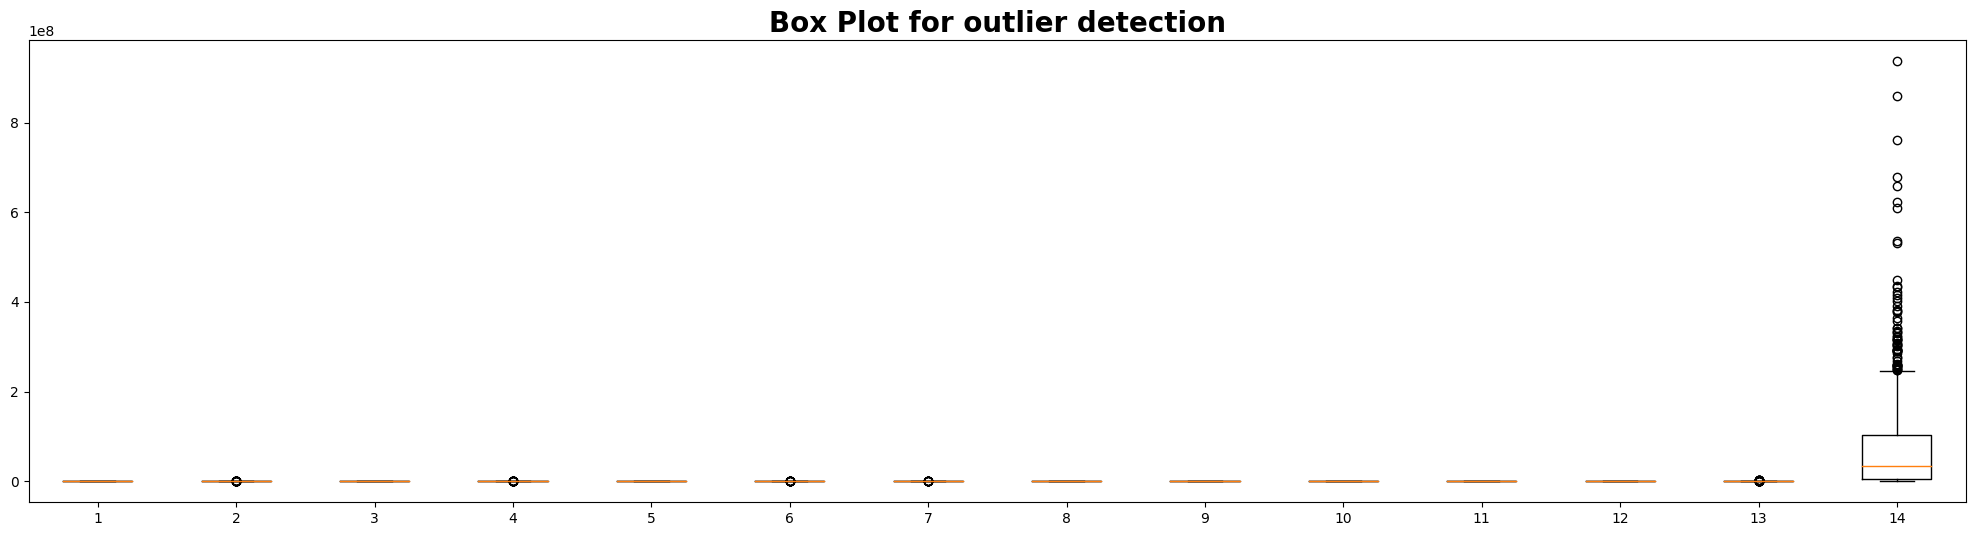

In [34]:
plt.figure(figsize = (25, 6), dpi =  100, facecolor = "white", edgecolor = "black")
plt.boxplot(
    df
)
plt.title("Box Plot for outlier detection", fontsize = 20, color = "black", fontweight = "bold", loc = "center")
plt.show()

In [35]:
scaler = StandardScaler()
df_array = scaler.fit_transform(df)

In [36]:
df_array

array([[ 1.32599406, -0.09342529, -1.53472956, ...,  1.66159733,
         5.61438575, -0.43541037],
       [ 0.99579125, -1.27716447, -1.53472956, ..., -0.96038348,
         3.57208192,  0.49238879],
       [ 0.9229524 ,  0.65986328,  1.15087596, ...,  0.60252273,
         5.50169979,  3.97205768],
       ...,
       [ 1.11233342, -1.5461961 ,  0.66258405, ..., -1.29969865,
        -0.53646566,  0.5522309 ],
       [-1.65068713, -1.70761508,  0.66258405, ...,  1.06008408,
        -0.89267629, -0.56211709],
       [-0.72320571, -2.29948467, -0.06985382, ..., -0.9089721 ,
        -0.88413399, -0.41662787]])

In [37]:
df = pd.DataFrame(df_array, columns = df.columns)

In [38]:
df

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1.325994,-0.093425,-1.534730,0.707377,0.691557,4.649784,0.229133,-0.793894,1.501060,0.626668,-1.406640,1.661597,5.614386,-0.435410
1,0.995791,-1.277164,-1.534730,1.982476,0.435744,4.308493,1.841888,-0.818895,0.545580,-1.700792,-0.414086,-0.960383,3.572082,0.492389
2,0.922952,0.659863,1.150876,1.093770,-1.440222,3.625912,0.551684,-1.160574,-1.054293,-0.589430,-1.733795,0.602523,5.501700,3.972058
3,1.000647,-1.169552,-1.534730,3.025739,0.435744,3.625912,1.035511,-0.818895,-1.676466,0.964149,1.022068,-0.960383,2.186283,-0.183427
4,-1.728382,-2.084259,0.662584,-1.070034,0.435744,3.625912,1.519337,1.164513,-0.350645,0.178632,0.389938,-0.189213,0.942643,-0.644086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,-0.674646,-1.330971,-0.558146,1.286967,1.565587,-1.152155,-0.012780,1.139512,1.108499,-0.414870,1.099698,0.422583,-0.921519,-0.675962
709,-0.291029,-1.384777,-0.802292,0.784656,-0.992548,-1.152155,-2.189999,-1.285579,-1.009852,1.394729,-0.913135,-1.217440,-0.878584,-0.670030
710,1.112333,-1.546196,0.662584,-1.765543,-0.544874,-1.152155,-0.980433,1.614530,0.930735,1.196895,0.312308,-1.299699,-0.536466,0.552231
711,-1.650687,-1.707615,0.662584,-1.417788,0.307837,-1.152155,1.519337,0.864502,0.078951,0.812864,-0.658066,1.060084,-0.892676,-0.562117


In [41]:
X = df.drop(columns = "Gross")
Y = df["Gross"]

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [44]:
model = LinearRegression()

In [45]:
model.fit(X_train, Y_train)

LinearRegression()

In [46]:
Y_pred = model.predict(X_test)

In [48]:
r2_score(Y_test, Y_pred)

0.5135261475159848

In [50]:
with open("movie_model.pkl", "wb") as f:
    pickle.dump(model, f)